Credit given to this video:
https://www.youtube.com/watch?v=X8aNFXJEENs

In [20]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
print(yf.version)
import matplotlib.pyplot as plt
from scipy.stats import norm

<module 'yfinance.version' from '/usr/local/lib/python3.12/dist-packages/yfinance/version.py'>


In [21]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

In [22]:
tickers = ['SPY', 'BND' , 'GLD' , 'QQQ', 'VTI']

In [23]:
adj_close_df = pd.DataFrame ()
for ticker in tickers:
  data = yf.download(ticker, start = startDate, end = endDate)
  adj_close_df[ticker] = data['Close']
print(adj_close_df)

/tmp/ipython-input-3827719454.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = startDate, end = endDate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3827719454.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = startDate, end = endDate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3827719454.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = startDate, end = endDate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3827719454.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = startDate, end = endDate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-inp

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2011-02-04  100.329369  51.823570  131.660004   50.329582   51.980610
2011-02-07  100.956650  51.830097  131.679993   50.566399   52.326542
2011-02-08  101.415703  51.666798  133.139999   50.899696   52.587963
2011-02-09  101.186172  51.790890  133.070007   50.811970   52.449581
2011-02-10  101.224426  51.627579  132.850006   50.890938   52.511078
...                ...        ...         ...         ...         ...
2026-01-26  692.729980  74.339996  464.700012  625.460022  342.029999
2026-01-27  695.489990  74.279999  476.100006  631.130005  343.269989
2026-01-28  695.419983  74.250000  494.559998  633.219971  343.079987
2026-01-29  694.039978  74.260002  495.899994  629.429993  342.290009
2026-01-30  691.969971  74.230003  444.950012  621.869995  340.570007

[3769 rows x 5 columns]


In [24]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2011-02-07  0.006233  0.000126  0.000152  0.004694  0.006633
2011-02-08  0.004537 -0.003156  0.011027  0.006570  0.004984
2011-02-09 -0.002266  0.002399 -0.000526 -0.001725 -0.002635
2011-02-10  0.000378 -0.003158 -0.001655  0.001553  0.001172
2011-02-11  0.005952  0.003410 -0.003997  0.007213  0.006567
...              ...       ...       ...       ...       ...
2026-01-26  0.005065  0.001211  0.014523  0.004390  0.004307
2026-01-27  0.003976 -0.000807  0.024236  0.009024  0.003619
2026-01-28 -0.000101 -0.000404  0.038041  0.003306 -0.000554
2026-01-29 -0.001986  0.000135  0.002706 -0.006003 -0.002305
2026-01-30 -0.002987 -0.000404 -0.108412 -0.012084 -0.005038

[3768 rows x 5 columns]


In [25]:
def expected_return(weights, log_returns):
  return np.sum(log_returns.mean () * weights)

In [26]:
def standard_deviation (weights, cov_matrix):
  variance = weights.T @ cov_matrix @ weights
  return np.sqrt(variance)

In [27]:
cov_matrix = log_returns.cov()
print(cov_matrix)

          SPY       BND       GLD       QQQ       VTI
SPY  0.000117  0.000001  0.000005  0.000132  0.000120
BND  0.000001  0.000010  0.000009  0.000002  0.000001
GLD  0.000005  0.000009  0.000103  0.000006  0.000005
QQQ  0.000132  0.000002  0.000006  0.000171  0.000134
VTI  0.000120  0.000001  0.000005  0.000134  0.000123


In [43]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [44]:
def random_z_score():
  return np. random.normal(0,1)

Setting days interval here for computing VaR... = 365 right now for 1 year interval

In [45]:
days = 365
def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
  return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [49]:
simulations = 1_000_000
scenarioReturn =[]
for i in range(simulations):
  z_score = random_z_score()
  scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [50]:
confidence_interval = 0.95
VaR = -np. percentile(scenarioReturn, 100*(1- confidence_interval))
print(VaR)

78102.25534679576


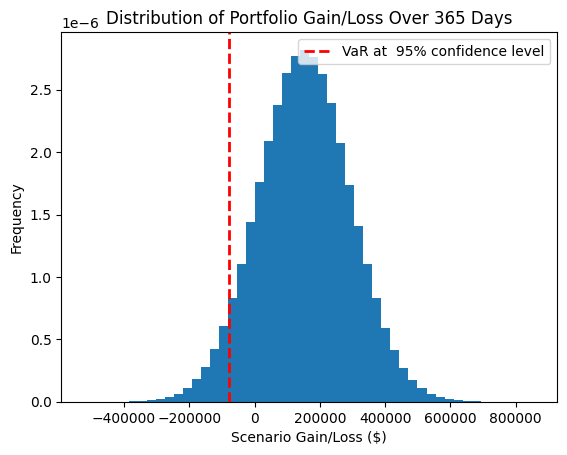

In [51]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel( 'Scenario Gain/Loss ($)')
plt.ylabel ( 'Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval: .0%} confidence level')
plt.legend ()
plt.show( )